

```

```

#  K-Means Clustering on Well Log Data for Low Resisitivity Pay Zone

In this project, we have carried out unsupervised learning classification using K-means clustering method.

### K-Means Clustering
K-Means clustering is a very commonly used unsupervised machine learning algorithm. It is used to group data into K number of clusters by minimising the distance between the data point and the centroid. 

The centroid is initialised at k random points in the data space and all points around it are assigned to the relevant cluster based on the distance to the centroid. The centroid is then adjusted to the central point of the cluster and the points surrounding it are reassigned. This continues until either there is no change in the centroids or the points remain in the same cluster or until a maximum number of iterations is reached.

## Dataset
The dataset we are using for this project forms part of a Machine Learning competition run by Xeek and FORCE 2020 (https://doi.org/10.5281/zenodo.4351155). The objective of the compettion was to predict lithology from existing labelled data. The dataset consists of 118 wells from the Norwegian Sea.

## Importing Libraries & Data Loading
The first step of the project is to import the libraries that we require.  For this example we will be using [NumPy](https://numpy.org) for working with arrays, [pandas](https://pandas.pydata.org) for storing data, [seaborn](https://seaborn.pydata.org) and [matplotlib](https://matplotlib.org) for displaying the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors

In [3]:
df = pd.read_csv("xeek_train_subset.csv")

In [4]:
df.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,133198.000000,125805.000000,1.258050e+05,125805.000000,133006.000000,62039.000000,125556.000000,125805.000000,108053.000000,133198.000000,17350.000000,91725.000000,100840.000000,132635.000000,93680.000000,97529.000000,130454.000000,12184.000000,56200.000000,105539.000000,101644.000000,1635.000000,13473.000000,38946.000000,133198.000000,133183.000000
mean,1792.944663,451235.640835,6.471392e+06,-1719.214522,13.199399,10.561825,1.708851,1.743774,2.199556,69.553872,59.813135,0.355602,4.511845,122.700286,91.608922,12.194539,28.163816,176.583712,0.972165,0.009307,2.291368,2.568148,25.253839,-112.944168,63261.582892,1.235796
std,739.441515,15299.395264,3.094449e+04,740.536678,3.561386,116.359983,9.127200,13.233330,0.236902,39.328728,25.538669,0.143857,5.092807,34.234879,98.781404,3.143410,45.592228,44.358622,43.000304,0.067312,17.882420,2.261201,14.319902,333.547482,13623.352961,0.480781
min,415.261599,436790.843750,6.429286e+06,-3246.156250,5.946157,0.130193,-0.008419,0.123068,1.366913,0.109284,-196.869995,-0.023143,1.010027,7.415132,-2.199269,8.500000,0.018832,93.068260,-12.215459,-1.795894,0.125818,0.362225,0.556113,-999.900024,30000.000000,1.000000
25%,1182.822400,437640.781250,6.453743e+06,-2334.161865,11.381848,0.759227,0.779763,0.777323,2.029237,43.244637,41.281138,0.234927,2.857540,87.899776,48.808243,8.500000,9.650485,149.754013,0.007800,-0.007736,0.137800,1.387308,14.260232,0.537328,65000.000000,1.000000
50%,1747.524495,444152.093750,6.463019e+06,-1626.893433,12.698571,0.997515,1.095681,1.130621,2.162121,66.266132,62.973612,0.382014,3.780121,135.968094,70.282761,12.250001,22.362363,162.537949,0.415419,0.003215,0.152180,2.133351,24.598738,0.879455,65000.000000,1.000000
75%,2413.874901,460442.093750,6.478963e+06,-1119.113525,14.944049,1.450392,1.535653,1.644573,2.404375,93.808681,73.933750,0.480985,5.098502,147.388626,92.173889,12.250001,35.444058,190.082294,1.118416,0.022928,0.168955,2.860770,33.749100,1.519061,65030.000000,1.000000
max,3272.024000,476770.156250,6.539631e+06,-375.251495,25.717396,2193.904541,1796.209106,1856.935059,3.115611,804.298950,152.516830,0.817310,365.575592,230.432953,526.547302,26.000002,2224.647461,377.327789,10006.789063,0.433157,185.730927,23.590172,86.378632,2000.000000,99000.000000,3.000000


In [5]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [6]:
workingdf = df[["WELL", "DEPTH_MD", "RDEP", "RHOB", "GR", "NPHI", "PEF", "DTC", "FORCE_2020_LITHOFACIES_LITHOLOGY"]].copy()

In [7]:
workingdf.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'FACIES'}, inplace=True)

In [8]:
workingdf

,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES
0,15/9-13,494.528000,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000
1,15/9-13,494.680000,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000
2,15/9-13,494.832000,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000
3,15/9-13,494.984000,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000
4,15/9-13,495.136000,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000
...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,5.339929,2.531374,127.456139,NaN,3.607062,NaN,30000
133194,16/2-16,2207.462396,5.689734,2.526128,128.403305,NaN,3.609151,NaN,30000
133195,16/2-16,2207.614396,5.496074,2.528934,127.829262,NaN,3.594580,NaN,30000
133196,16/2-16,2207.766396,5.345353,2.527052,126.552277,NaN,3.534883,NaN,30000


## Column Remapping / Renaming

In [9]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [10]:
simple_lithology_numbers = {30000: 1,
                 65030: 2,
                 65000: 3,
                 80000: 4,
                 74000: 5,
                 70000: 6,
                 70032: 7,
                 88000: 8,
                 86000: 9,
                 99000: 10,
                 90000: 11,
                 93000: 12}

In [11]:
workingdf['LITH'] = workingdf['FACIES'].map(lithology_numbers)

In [12]:
workingdf['LITH_SI'] = workingdf['FACIES'].map(simple_lithology_numbers)

When we view the dataframe, we can see that we now have our two new columns at the end.

In [13]:
workingdf

,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH,LITH_SI
0,15/9-13,494.528000,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000,Shale,3
1,15/9-13,494.680000,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000,Shale,3
2,15/9-13,494.832000,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000,Shale,3
3,15/9-13,494.984000,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000,Shale,3
4,15/9-13,495.136000,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000,Shale,3
...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,5.339929,2.531374,127.456139,NaN,3.607062,NaN,30000,Sandstone,1
133194,16/2-16,2207.462396,5.689734,2.526128,128.403305,NaN,3.609151,NaN,30000,Sandstone,1
133195,16/2-16,2207.614396,5.496074,2.528934,127.829262,NaN,3.594580,NaN,30000,Sandstone,1
133196,16/2-16,2207.766396,5.345353,2.527052,126.552277,NaN,3.534883,NaN,30000,Sandstone,1


## Visualising the Data

As there is already a FACIES column with this data, we can take a quick look to see how the data is distributed across each lithofacies.

To do this we can use Seaborn's `FacetGrid` method to plot individual density-neutron crossplots (scatterplots) for each lithology. 

The FacetGrid is used to create an underlying structure for the plot. In this example, the FacetGrid has been passed the dataframe we are working with (`workingdf`), the column we want to split the plots up by (`col`) and the point at which we want to wrap to a new row (`col_wrap`). In this instance, once there are 4 columns, then the data will wrap.

We can then map a density neutron crossplot ontop of that `FacetGrid`.

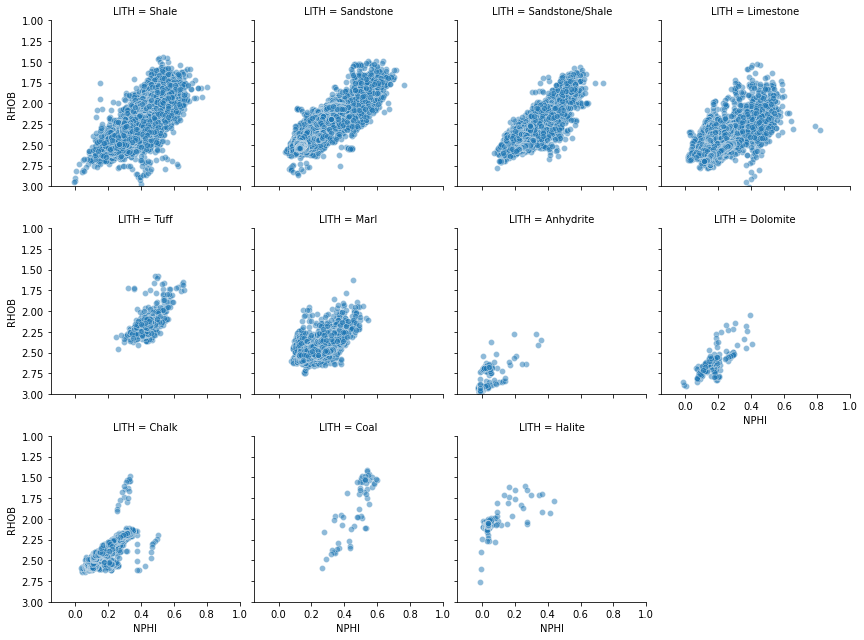

In [14]:
g = sns.FacetGrid(workingdf, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

Before we plot any data we need to create a few functions. The first is a create plot function, which will take a number of arguments and our facies curve, and will generate a conventional log plot.

In [15]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    facies_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red','black', 'blue']
    
            
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max()], 'indexed')
            
            cluster=np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(), 
                            extent=[0,20, depth_curve.max(), depth_curve.min()])
            
#             for key in lithology_setup.keys():
#                 color = lithology_setup[key]['color']
#                 ax[i].fill_betweenx(depth_curve, 0, dataframe[curve].max(), 
#                                   where=(dataframe[curve]==key),
#                                   facecolor=color)
#                 
        else:
            ax[i].plot(dataframe[curve], depth_curve)

        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
#         ax[i].set_ylim(3500, 3000)

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        

    
    plt.tight_layout()
    plt.show()
    
    return cmap_facies

### Splitting Data by Well Function
The second method we will create will be used to split up our dataframe by wells. This is done using the `groupby` function, and will allow us to store each dataframe within a list for easy access later.

In [16]:
def well_splitter(dataframe, groupby_column):
    grouped = dataframe.groupby(groupby_column)
    
    # Create empty lists
    wells_as_dfs = []
    wells_wellnames = []

    #Split up the data by well
    for well, data in grouped:
        wells_as_dfs.append(data)
        wells_wellnames.append(well)

    print('index  wellname')
    for i, name in enumerate(wells_wellnames):
        print(f'{i}      {name}')
    
    return wells_as_dfs, wells_wellnames

In [17]:
grouped_wells, grouped_names = well_splitter(workingdf, 'WELL')

index  wellname
0      15/9-13
1      15/9-15
2      15/9-17
3      16/1-2
4      16/1-6 A
5      16/10-1
6      16/10-2
7      16/10-3
8      16/10-5
9      16/11-1 ST3
10      16/2-11 A
11      16/2-16


We now have a list of wells and their index position with the list object. 

## K-Means Clustering 

In [18]:
from sklearn.cluster import KMeans


### Finding the Optimum Number of Clusters



In [19]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
    

For clustering to work, we need to remove any missing values. This is achieved using the `dropna()` function.

In [20]:
workingdf.dropna(inplace=True)

We can then use the `describe()` function to make sure our data is still good after the missing data values have been removed. In this example we have gone from 133198 to 82732 depth levels.

In [21]:
workingdf.describe()

,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH_SI
count,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000
mean,2026.091770,1.949349,2.216580,67.769272,0.364413,4.617041,116.211408,62691.493352,3.355848
std,622.447842,16.295946,0.225473,36.640160,0.139758,3.937549,30.752148,13172.216175,1.671553
min,705.550396,0.123068,1.412190,5.782680,-0.005300,1.126667,7.415132,30000.000000,1.000000
25%,1516.358446,0.737603,2.034906,44.220089,0.243001,3.140069,86.331350,65000.000000,3.000000
50%,2010.897600,1.098597,2.178304,64.679111,0.403345,4.012710,125.787430,65000.000000,3.000000
75%,2569.647947,1.771478,2.421446,87.443424,0.484445,5.247028,144.037128,65030.000000,3.000000
max,3198.760000,1856.935059,3.005321,804.298950,0.800262,288.103638,230.432953,99000.000000,11.000000


To keep our model simple we will work with four logging measurements (columns): Gamma Ray (GR), Bulk Density (RHOB), Neutron Porosity (NPHI) and Acoustic Compressional Slowness (DTC).

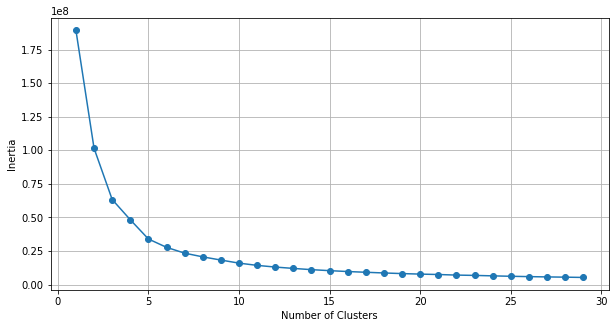

In [22]:
optimise_k_means(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']], 30)

In the plot above, we can see that the inertia (sum of the squared distances to the nearest cluster center) decreases as we increase the number of clusters. There is no clear defined break within this dataset, however, we can see that the slope changes from about 5 clusters onwards. The picking of this value will be dependent on the interpreter and could range from 4 to 10.

So for this example we will take 5 as the optimum number of clusters.

### Fitting the Clustering Models

In [23]:
# Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to our dataset
kmeans.fit(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']])

# Assign the data back to the workingdf
workingdf['KMeans'] = kmeans.labels_

## Plotting the Results



In [24]:
dfs_wells, wellnames = well_splitter(workingdf, 'WELL')

index  wellname
0      15/9-13
1      15/9-15
2      15/9-17
3      16/1-6 A
4      16/10-1
5      16/10-2
6      16/10-3
7      16/10-5
8      16/2-11 A
9      16/2-16


The first plot we will look at is the logplot. We will pass in the original lithofacies (LITH_SI) column and the newly computed KMeans
results.

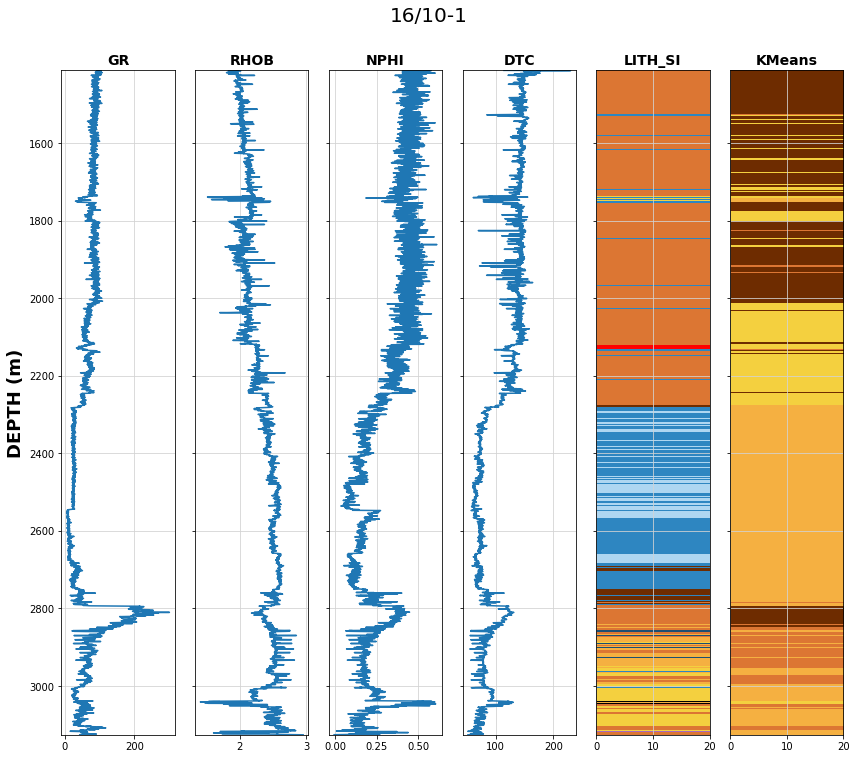

In [26]:
# Setup the curves to plot
curves_to_plot = ['GR', 'RHOB', 'NPHI', 'DTC',  'LITH_SI', 'KMeans']
logarithmic_curves = ['RDEP']
facies_curve=['KMeans','LITH_SI']

# Create plot by passing in the relevant well index number
well = 4
cmap_facies = create_plot(wellnames[well], 
            dfs_wells[well], 
            curves_to_plot, 
            dfs_wells[well]['DEPTH_MD'], 
            logarithmic_curves, facies_curve)

In the plot above we have the original Lithology and our computed KMeans cluster results in the last two subplots. 

Looking at well 16/10-1 (index 4), we have 10 separate facies/groups displayed and we can see that these mostly tie up with the changes in the logging measurements. For example the decrease in Gamma Ray (GR) from around 2300m to around 2775m ties in nicely with the blue and light blue grouping. 

### Viewing Results on Scatterplots / Crossplots

Another way to view the performance of the clustering is through scatter plots. We can do this using the common density-neutron scatterplots / crossplots and using matplotlib.

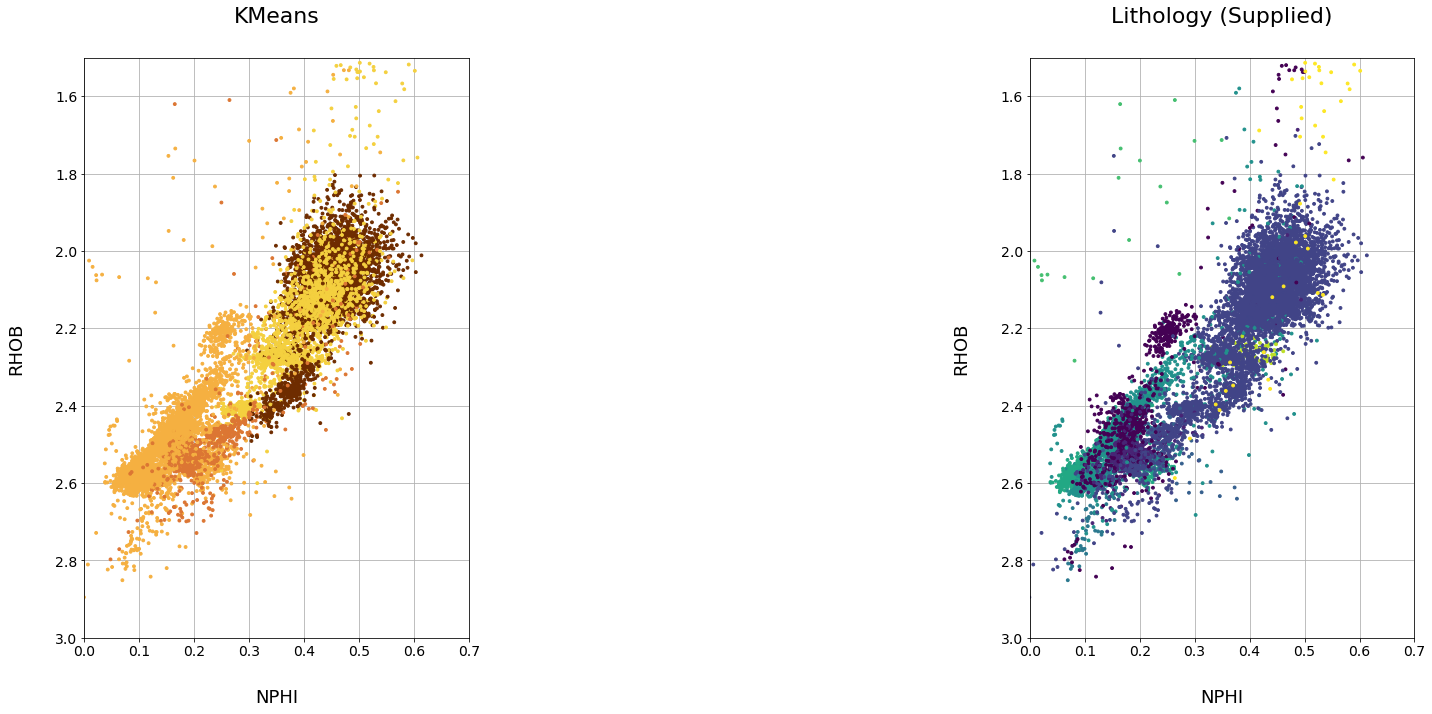

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
ax1 = plt.subplot2grid((1,3), (0,0))
ax1.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['KMeans'], s=8, cmap=cmap_facies)
ax1.set_title('KMeans', fontsize=22, y=1.05)



ax2 = plt.subplot2grid((1,3), (0,2))
ax2.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['LITH_SI'], s=8)
ax2.set_title('Lithology (Supplied)', fontsize=22, y=1.05)

for ax in [ax1, ax2]:
    ax.set_xlim(0, 0.7)
    ax.set_ylim(3, 1.5)
    ax.set_ylabel('RHOB', fontsize=18, labelpad=30)
    ax.set_xlabel('NPHI', fontsize=18, labelpad=30)
    ax.grid()
    ax.set_axisbelow(True)

    ax.tick_params(axis='both', labelsize=14)
plt.tight_layout()

# References

Bormann, Peter, Aursand, Peder, Dilib, Fahad, Manral, Surrender, & Dischington, Peter. (2020). FORCE 2020 Well well log and lithofacies dataset for machine learning competition [Data set]. Zenodo. http://doi.org/10.5281/zenodo.4351156